# UNSUPERVISED LEARNING

# K-Means

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\capstone project\omsicc.csv")
data.head()

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,Unknown,No,Yes,Often,15,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,Unknown,No,No,Rarely,1250,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Unknown,No,No,Rarely,15,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Unknown,Yes,Yes,Often,63,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Unknown,No,No,Never,300,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1136 non-null   int64 
 1   self_employed              1136 non-null   object
 2   family_history             1136 non-null   object
 3   treatment                  1136 non-null   object
 4   work_interfere             1136 non-null   object
 5   no_employees               1136 non-null   int64 
 6   remote_work                1136 non-null   object
 7   tech_company               1136 non-null   object
 8   benefits                   1136 non-null   object
 9   care_options               1136 non-null   object
 10  wellness_program           1136 non-null   object
 11  seek_help                  1136 non-null   object
 12  anonymity                  1136 non-null   object
 13  leave                      1136 non-null   object
 14  mental_h

In [290]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Age','no_employees', 'family_history', 'treatment', 'work_interfere', 
            'benefits', 'care_options', 'wellness_program', 'leave']

numeric_features = ['no_employees']
categorical_features = [col for col in features if col not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_prepared = pipeline.fit_transform(data[features])

In [291]:
from sklearn.cluster import KMeans
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=20,
        max_iter=1000,
        random_state=42
    ))
])

data['cluster'] = kmeans_pipeline.fit_predict(data[features])

print(data)

      Age self_employed family_history treatment work_interfere  no_employees  \
0      37       Unknown             No       Yes          Often            15   
1      44       Unknown             No        No         Rarely          1250   
2      32       Unknown             No        No         Rarely            15   
3      31       Unknown            Yes       Yes          Often            63   
4      31       Unknown             No        No          Never           300   
...   ...           ...            ...       ...            ...           ...   
1131   36            No            Yes        No         Rarely          1250   
1132   26            No             No       Yes        Unknown            63   
1133   32            No            Yes       Yes          Often            63   
1134   34            No            Yes       Yes      Sometimes          1250   
1135   25            No            Yes       Yes      Sometimes            63   

     remote_work tech_compa

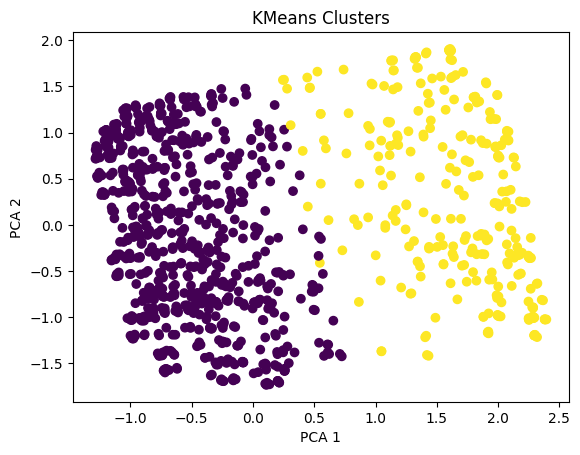

In [292]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_transformed = preprocessor.fit_transform(data[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clusters')
plt.show()


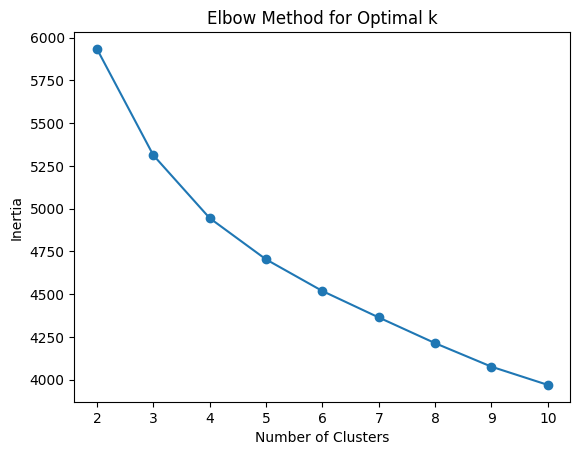

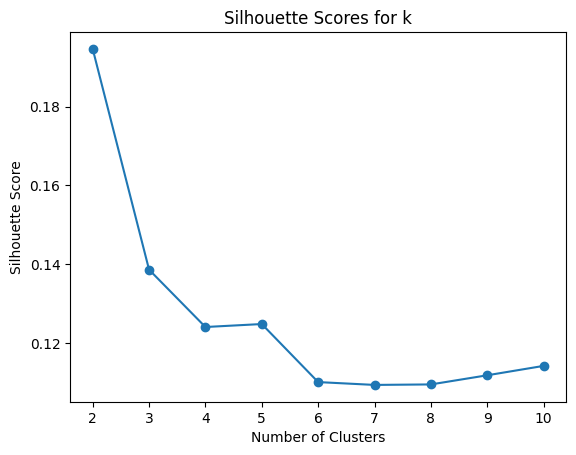

Silhouette score for k-means (k=2): 0.195


In [307]:
X_processed = preprocessor.fit_transform(data[features])
inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=500, random_state=42)
    kmeans.fit(X_processed)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

silhouette_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=500, random_state=42)
    cluster_labels = kmeans.fit_predict(X_processed)
    silhouette_values.append(silhouette_score(X_processed, cluster_labels))

plt.plot(range(2, 11), silhouette_values, marker='o')
plt.title('Silhouette Scores for k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


final_k = 2
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=final_k, init='k-means++', n_init=20, max_iter=500, random_state=42))
])

data['cluster'] = kmeans_pipeline.fit_predict(data[features])
from sklearn.metrics import silhouette_score

# Fit the pipeline and get cluster labels
cluster_labels = kmeans_pipeline.fit_predict(data[features])

# Calculate silhouette score
sil_score_final = silhouette_score(
    preprocessor.transform(data[features]),  # Use the processed features
    cluster_labels
)

print(f"Silhouette score for k-means (k={final_k}): {sil_score_final:.3f}")



# Agglomerative Hierarchical Clustering

In [294]:
data_1 = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\capstone project\omsicc.csv")
data_1

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,Unknown,No,Yes,Often,15,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,Unknown,No,No,Rarely,1250,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Unknown,No,No,Rarely,15,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Unknown,Yes,Yes,Often,63,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Unknown,No,No,Never,300,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,36,No,Yes,No,Rarely,1250,No,No,Don't know,No,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,Male
1132,26,No,No,Yes,Unknown,63,No,Yes,No,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,Male
1133,32,No,Yes,Yes,Often,63,Yes,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Male
1134,34,No,Yes,Yes,Sometimes,1250,No,Yes,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Male


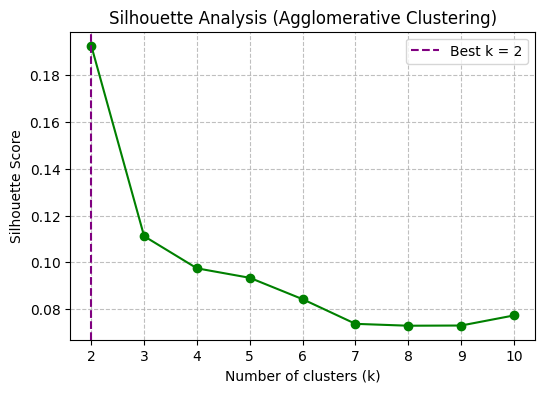

Best k by silhouette: 2 (score=0.192)


In [300]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

features = ['Age', 'no_employees','family_history', 'treatment', 'work_interfere', 
            'benefits', 'care_options', 'wellness_program', 'leave']

numeric_features = ['Age', 'no_employees']
categorical_features = [col for col in features if col not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

prep_pipeline = Pipeline(steps=[('preprocess', preprocessor)])

X_prepared = prep_pipeline.fit_transform(data_1[features])

sil_scores = []
K = range(2, 11)

for k in K:
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agglo.fit_predict(X_prepared.toarray() if hasattr(X_prepared, 'toarray') else X_prepared)
    sil_scores.append(silhouette_score(X_prepared, labels))

best_k_sil = K[np.argmax(sil_scores)]

plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, 'o-', color='green')
plt.axvline(best_k_sil, color='purple', linestyle='--', label=f'Best k = {best_k_sil}')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (Agglomerative Clustering)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

print(f"Best k by silhouette: {best_k_sil} (score={max(sil_scores):.3f})")

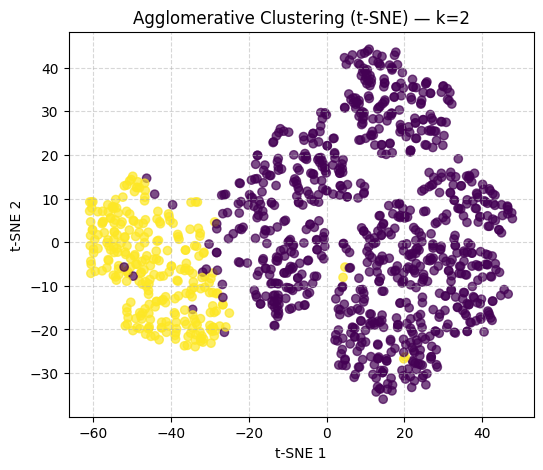

In [301]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

agglo_best = AgglomerativeClustering(n_clusters=best_k_sil, metric='euclidean', linkage='ward')
labels = agglo_best.fit_predict(X_prepared.toarray() if hasattr(X_prepared, 'toarray') else X_prepared)

X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=300, random_state=42).fit_transform(
    X_prepared.toarray() if hasattr(X_prepared, 'toarray') else X_prepared
)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'Agglomerative Clustering (t-SNE) — k={best_k_sil}')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# DBSCAN

In [297]:
new= pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\capstone project\omsicc.csv")
new

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,Unknown,No,Yes,Often,15,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,Unknown,No,No,Rarely,1250,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Unknown,No,No,Rarely,15,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Unknown,Yes,Yes,Often,63,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Unknown,No,No,Never,300,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,36,No,Yes,No,Rarely,1250,No,No,Don't know,No,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,Male
1132,26,No,No,Yes,Unknown,63,No,Yes,No,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,Male
1133,32,No,Yes,Yes,Often,63,Yes,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Male
1134,34,No,Yes,Yes,Sometimes,1250,No,Yes,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Male


In [298]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

mask = labels != -1
if len(set(labels[mask])) > 1: 
    score = silhouette_score(X[mask], labels[mask])
    print("Silhouette Score:", score)
else:
    print("Not enough clusters for silhouette score.")

Silhouette Score: 0.709290307841025


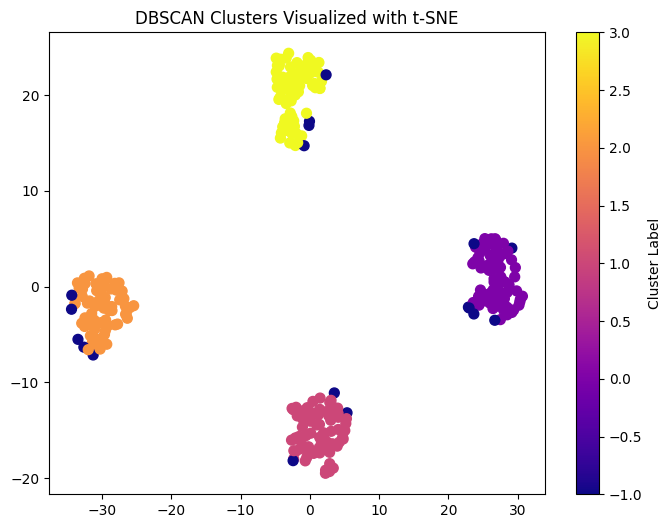

In [299]:
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='plasma', s=50)
plt.colorbar(label="Cluster Label")
plt.title("DBSCAN Clusters Visualized with t-SNE")
plt.show()